# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

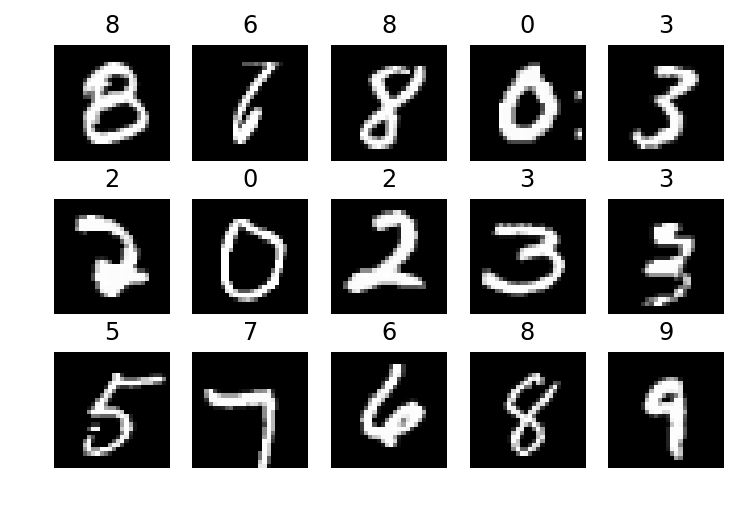

In [3]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [4]:
import numpy as np
from sklearn.cross_validation import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

number_range = range(0,10)

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        num = random.randint(1, n_len)
        pos = random.sample(range(n_len), num)
        index = [random.choice(range(X.shape[0])) for count in range(num)]
        for j in range(num):
            X_gen[i, :, pos[j] * width: (pos[j] + 1) * width, 0] = X[index[j], :, :]
            y_gen[pos[j]][i, y[index[j]]] = 1
        for j in range(n_len):
            if j not in pos:
                y_gen[j][i, 10] = 1
    
    
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

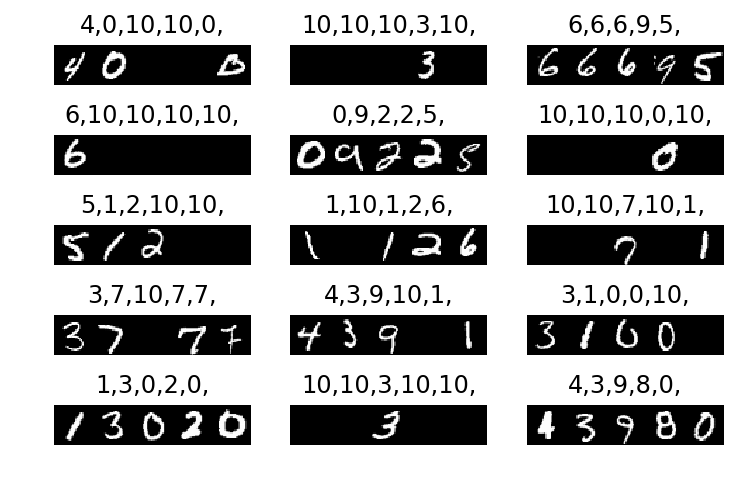

In [5]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**
合成数据集：我是先产生一个范围在1～5的随机整数num，来确定图片中数字的个数有多少个。然后产生num个1～5的随机整数pos（不重复），表示是哪几个位置会有数字。最后产生num个范围为0～X.shape[0]之间的随机整数index（可重复），表示对应的那几个位置的数字是X中哪些下标的数字。最后，对于没有数字的位置，维持初始化的0就可以了。这样就产生了一张图片。重复以上操作X_len次，就得到X_len个样本。  
  
上述对训练集，验证集以及测试集的生成都一样，不同的是，上述的index分别是指训练集X_raw_train,验证集X_raw_valid,以及测试集X_raw_test的index。  
  
  
分成训练集，验证集，以及测试集，是因为：  
  
  
训练集用来训练模型得到参数，比如这里的权重w和偏置项b。  
  
  
验证集可以用来验证模型的超参数是否合适，比如神经网络的层数，每一层的神经元数，每一层属于什么类型的网络，dropout的大小等等这些超参数。  
  
  
由于反复的用验证集进行验证，其实验证集也就渗入了训练集了（因为调的参数就是根据验证集的结果来决定的），这样选择出来的模型有可能会过拟合。所以，要有测试集，用于模型决定了之后，最后用来测试模型的好坏。由于测试集是自始至终，模型没有见过的，所以测出来的结果就比较客观了。


### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [7]:
from keras.models import Model
from keras.layers import *

# TODO: 构建你的模型
input_tensor = Input((height, width * n_len, 1))
x = input_tensor
for i in range(3):
    x = Convolution2D(80 * 2 ** i, 2, 2, activation='relu')(x)
    x = Convolution2D(100 * 2 ** i, 2, 2, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax')(x) for i in range(5)]
model = Model(input=input_tensor, output=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

** 回答：** 
为解决这个问题，首先我对样本的标签进行了one-hot encoding的编码，其中增加了一个维度，用来表示没有数字。这样每个数字用一个十一维的向量表示，所以一个样本会有五个十一维的向量。  
训练过程中，我运用了在两个维度方向上的卷积神经网络，深度（卷积核数）分别是80，100，160，200，320，400。每次卷积了后应用了"relu"的激活函数对该层网络的输出进行非线性的映射，使得网络的表示能力更强。为了采样得到重要特征，同时减低模型的规模以及减少过拟合，中间也用了窗口大小为2\*2的取最大数的池化层网络。然后，用了扁平层把网络变成1\*n的向量以便后面网络全连接，并用了drop率为0.25的dropout层以减少模型的过拟合。最后要分类预测五个数字时，并列连接了五个网络，每个网络十一个神经元，每个网络后面跟着softmax函数用来得到属于每个数字的概率大小(这里softmax函数的作用可以理解为，对神经元输出来的十一个值，进行函数的归一化映射，使得映射后的十一个值范围都在0～1，而且总和等于1，我们可以把这些值看做是该图片的那个位置的数字（或者没有数字）对应这十一个类别的概率。)softmax公式如下：  
$$y_i=\frac{e^{x_i}}{\sum_{k=1}^ne^{x_k}},i=1,2,...,n$$

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

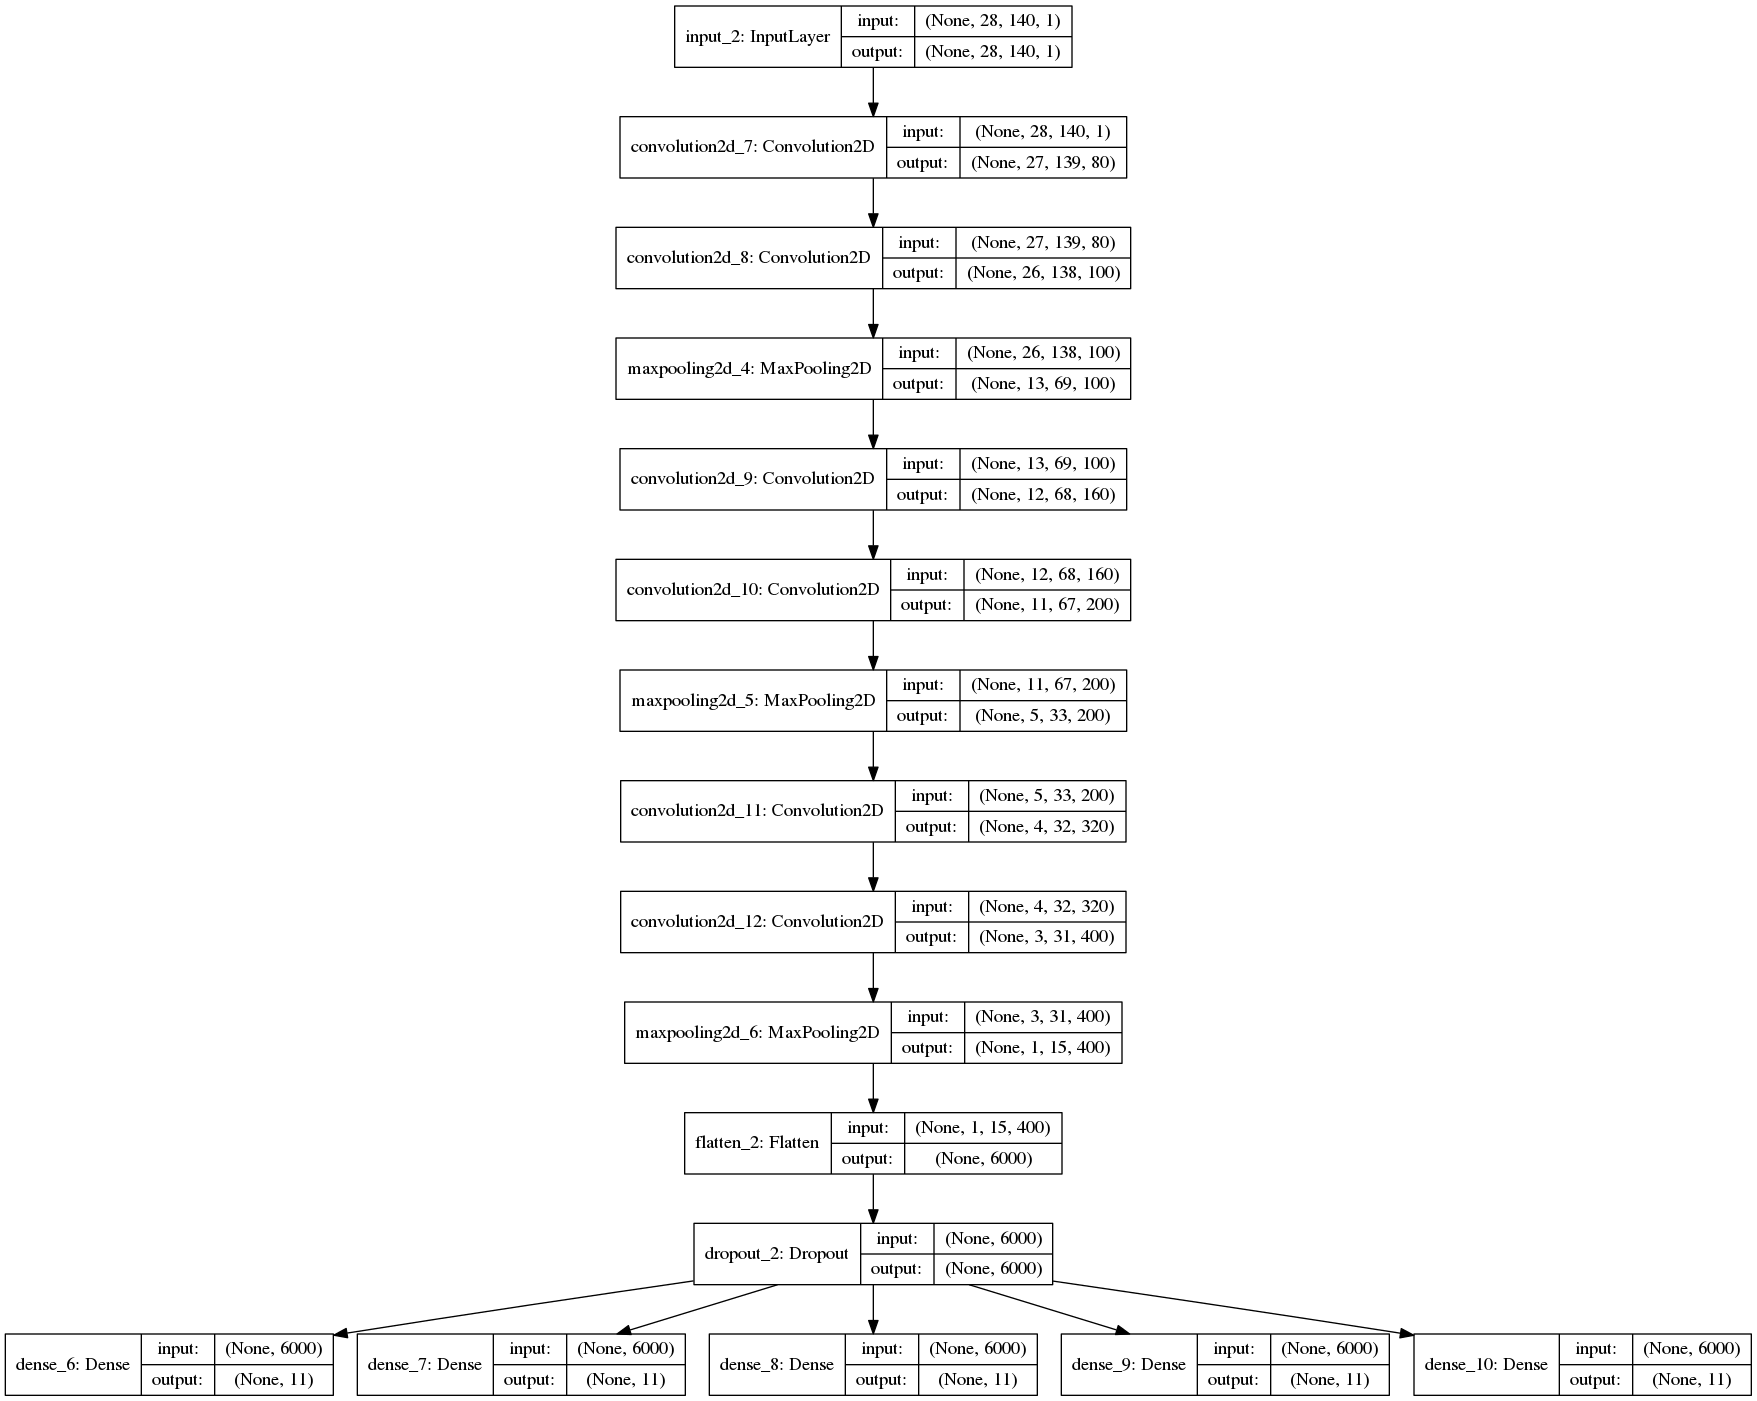

In [8]:
from keras.utils.visualize_util import plot, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
plot(model, to_file="model.png", show_shapes=True)
Image('model.png')

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
我的最终模型是：  
第一层是输入网络层，大小是28\*140\*1，分别表示28维高，140维宽，1维度的颜色  
第二层是卷积神经网络，大小为2\*2的卷积核数80个  
第三层是卷积神经网络，大小为2\*2的卷积核数100个  
第四层是最大-池化层，大小为2\*2  
第五层是卷积神经网络，大小为2\*2的卷积核数160个  
第六层是卷积神经网络，大小为2\*2的卷积核数200个  
第七层是最大-池化层，大小为2\*2  
第八层是卷积神经网络，大小为2\*2的卷积核数320个  
第九层是卷积神经网络，大小为2\*2的卷积核数400个  
第十层是最大-池化层，大小为2\*2  
第十一层是flatten层，把前面最大池化层展成一个1\*6000的向量  
第十二层是dropout层，依然是1\*6000，drop率是0.25  
第十三层是5个并列的softmax层，它们都与前面的dropout层全连接，都是输入6000维的向量，都是输出为11维的向量，表示对应的十一个类别的概率大小。  

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [11]:
# TODO: 训练你的模型
model.fit(X_train, y_train, validation_data=(X_valid,y_valid),batch_size=30, nb_epoch = 10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 150s - loss: 0.1562 - dense_6_loss: 0.0290 - dense_7_loss: 0.0305 - dense_8_loss: 0.0269 - dense_9_loss: 0.0283 - dense_10_loss: 0.0415 - dense_6_acc: 0.9905 - dense_7_acc: 0.9904 - dense_8_acc: 0.9918 - dense_9_acc: 0.9909 - dense_10_acc: 0.9872 - val_loss: 0.1448 - val_dense_6_loss: 0.0252 - val_dense_7_loss: 0.0268 - val_dense_8_loss: 0.0289 - val_dense_9_loss: 0.0286 - val_dense_10_loss: 0.0354 - val_dense_6_acc: 0.9930 - val_dense_7_acc: 0.9923 - val_dense_8_acc: 0.9913 - val_dense_9_acc: 0.9921 - val_dense_10_acc: 0.9890
Epoch 2/10
48000/48000 [==============================] - 150s - loss: 0.0787 - dense_6_loss: 0.0143 - dense_7_loss: 0.0162 - dense_8_loss: 0.0129 - dense_9_loss: 0.0139 - dense_10_loss: 0.0213 - dense_6_acc: 0.9958 - dense_7_acc: 0.9950 - dense_8_acc: 0.9961 - dense_9_acc: 0.9960 - dense_10_acc: 0.9934 - val_loss: 0.1339 - val_dense_6_loss: 0.0232 - val_de

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [12]:
# test accuracy
y_pred = model.predict(X_test,verbose=1)
y_true =np.argmax(y_test,2).T
y_hat = np.argmax(y_pred,2).T
test_accuracy = (y_true==y_hat).all(axis=1).mean()
print('test_accuracy')
print(test_accuracy)

10000/10000 [==============================] - 8s     
test_accuracy
0.9679


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**
模型准确率是0.9679。我觉得模型已经足以解决问题了。因为平均下来，每一百个错3个左右，对于绝大部分的任务都是可以接受的了。如果有更高准确度要求的任务，可以考虑把dropout率调高些，毕竟验证集比测试集的准确率高了0.02左右，说明模型稍微有点过拟合。或者这里可以把迭代数增大些，让模型见识更多的各种随机组合图片，这样也能提高泛化程度，从而提高对测试集的准确率预测。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

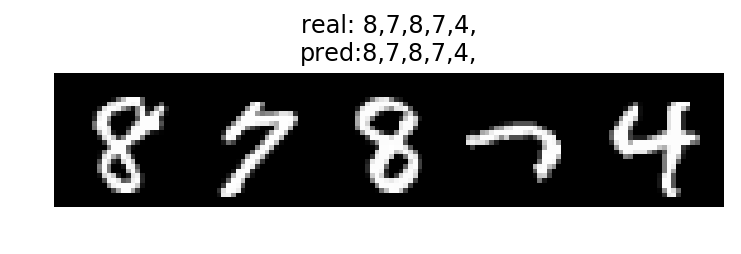

In [13]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [14]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())